<a href="https://colab.research.google.com/github/camiloacr1322/Taller_python_tres_integrantes_TPC/blob/main/PuntoATallerPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# demografia_basica.py
get_ipython().system('pip install pandas')
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
 # Leer los datos
 df = pd.read_excel('/content/JEFAB_LISTO.xlsx')
 df.head()

,ID,UNIDAD,CATEGORIA,EDAD2,SEXO,FRECUENCIA_VISITA_FAMILIAR,ESTADO_CIVIL,HIJOS,NUMERO_HIJOS,HIJOS_EN_HOGAR,RELACION_HIJOS,HERMANOS,ESPECIFICACION_CASADO,CASADO_FUERZA_MILITAR,TIPO_RELACION_PAREJA,RELACION_PAREJA_ESTABLE,PRINCIPAL_NECESIDAD_FAMILIAR,MALTRATO_INTRAFAMILIAR,FRECUENCIA_VISITA_FAMILIAR.1
0,5625,cacom-1,suboficial,22,hombre,mas de 5 veces al ano,soltero/a,no,0,0,no responde,si,no responde,no responde,no responde,no,no aplica,si,mas de 5 veces al ano
1,5627,cacom-1,suboficial,20,hombre,1 vez al ano,soltero/a,no,0,0,no responde,si,no responde,no responde,no responde,no,tiempo para compartir,no,1 vez al ano
2,4781,cacom-1,suboficial,45,hombre,3 veces al ano,casado,si,2,2,cercana,si,esposa/o civil externo a la institucion,no responde,cercana,si,union,no,3 veces al ano
3,5632,cacom-1,suboficial,22,hombre,mas de 5 veces al ano,soltero/a,no,0,0,no responde,si,no responde,no responde,cercana,si,tiempo para compartir,no,mas de 5 veces al ano
4,5635,cacom-1,civil,51,mujer,no aplica,casado,si,1,1,cercana,si,esposa/o civil externo a la institucion,no responde,cercana,si,no aplica,no,no aplica


In [17]:
# Valore de sexo
print(df["SEXO"].unique())

['hombre' 'mujer']


=== INFORMACIÓN GENERAL ===
Total de registros: 5931
Total de columnas: 19

=== ANÁLISIS DE EDAD ===
Edad promedio: 36.3 años
Edad mínima: 18 años
Edad máxima: 68 años

=== ANÁLISIS DE GÉNERO ===
SEXO
hombre    4127
mujer     1804
Name: count, dtype: int64


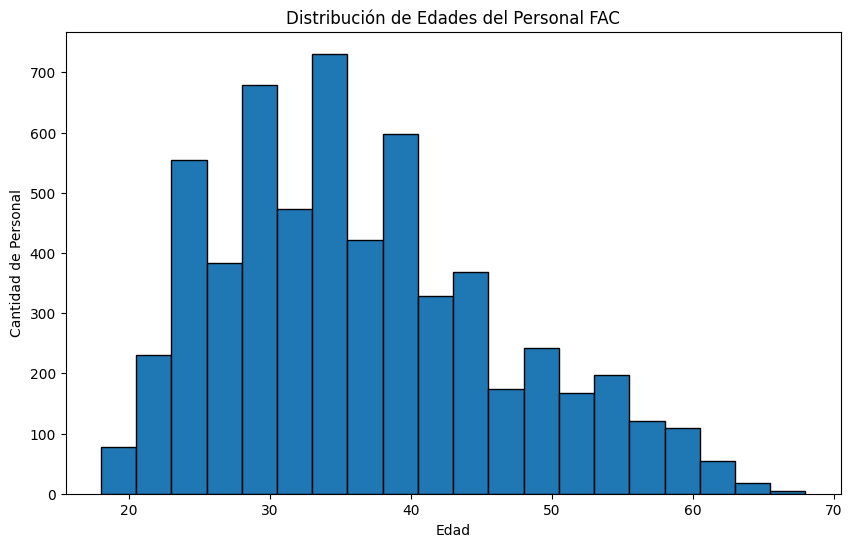

In [7]:
# Explorar estructura básica
print("=== INFORMACIÓN GENERAL ===")
print(f"Total de registros: {len(df)}")
print(f"Total de columnas: {len(df.columns)}")
# Análisis de edad
print("\n=== ANÁLISIS DE EDAD ===")
print(f"Edad promedio: {df['EDAD2'].mean():.1f} años")
print(f"Edad mínima: {df['EDAD2'].min()} años")
print(f"Edad máxima: {df['EDAD2'].max()} años")
# Análisis de género
print("\n=== ANÁLISIS DE GÉNERO ===")
print(df['SEXO'].value_counts())
# Gráfico de edades
plt.figure(figsize=(10, 6))
plt.hist(df['EDAD2'], bins=20, edgecolor='black')
plt.title('Distribución de Edades del Personal FAC')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Personal')
plt.show()

In [9]:
print("\n=== RANGO ETARIO ===")
df['RANGO_EDAD'] = pd.cut(
    df['EDAD2'],
    bins=[17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 70],  # intervalos de 5 en 5
    labels=['18-22', '23-27', '28-32', '33-37', '38-42', '43-47',
            '48-52', '53-57', '58-62', '63-67', '68-69'],   # nombres de los rangos
    right=True  # incluyo el valor del límite derecho en cada intervalo
)
print(df['RANGO_EDAD'].value_counts())


=== RANGO ETARIO ===
RANGO_EDAD
28-32    1152
33-37    1152
23-27     937
38-42     926
43-47     542
48-52     409
53-57     319
18-22     307
58-62     164
63-67      20
68-69       3
Name: count, dtype: int64


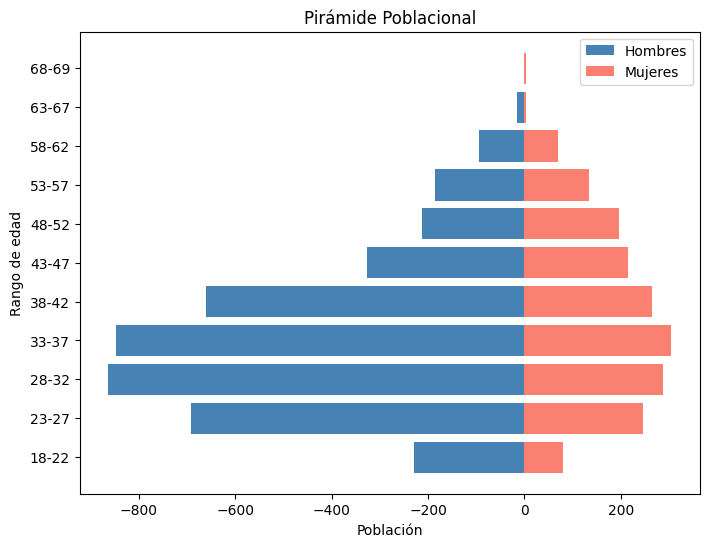

In [19]:
# Agrupar por rango y sexo (en minúsculas)
piramide = df.groupby(["RANGO_EDAD", "SEXO"], observed=False).size().unstack(fill_value=0)

# Asegurar columnas (por si falta alguna en algún rango)
if "hombre" not in piramide.columns:
    piramide["hombre"] = 0
if "mujer" not in piramide.columns:
    piramide["mujer"] = 0

# Pasar los hombres a valores negativos (para graficarlos a la izquierda)
piramide["hombre"] = -piramide["hombre"]

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(piramide.index, piramide["hombre"], color="steelblue", label="Hombres")
ax.barh(piramide.index, piramide["mujer"], color="salmon", label="Mujeres")

# Personalización
ax.set_xlabel("Población")
ax.set_ylabel("Rango de edad")
ax.set_title("Pirámide Poblacional")
ax.legend()

plt.show()

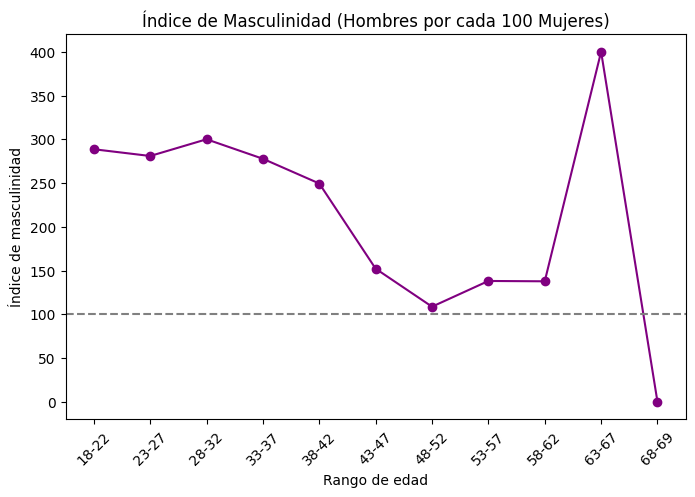

In [18]:
# Agrupar por rango y sexo (en minúsculas)
tabla = df.groupby(["RANGO_EDAD", "SEXO"], observed=False).size().unstack(fill_value=0)

# Asegurar columnas
if "hombre" not in tabla.columns:
    tabla["hombre"] = 0
if "mujer" not in tabla.columns:
    tabla["mujer"] = 0

# Calcular índice de masculinidad (hombres por cada 100 mujeres)
tabla["IndiceMasculinidad"] = (tabla["hombre"] / tabla["mujer"].replace(0, 1)) * 100

# Gráfico
plt.figure(figsize=(8,5))
plt.plot(tabla.index.astype(str), tabla["IndiceMasculinidad"], marker="o", color="purple")
plt.axhline(100, color="gray", linestyle="--")
plt.title("Índice de Masculinidad (Hombres por cada 100 Mujeres)")
plt.xlabel("Rango de edad")
plt.ylabel("Índice de masculinidad")
plt.xticks(rotation=45)
plt.show()


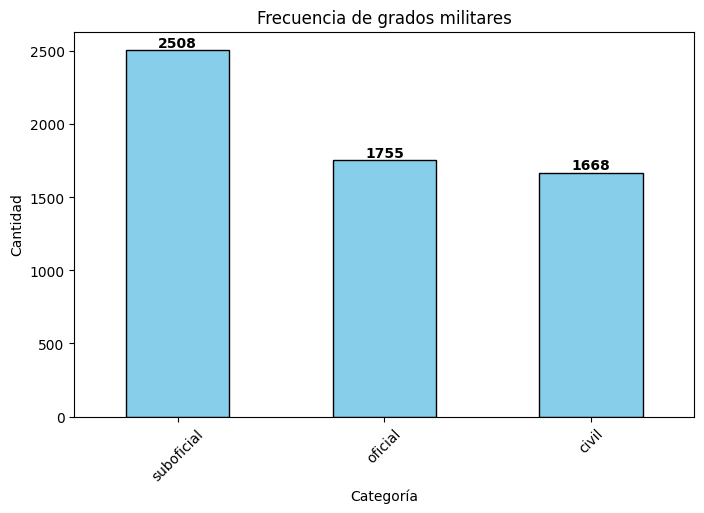

Grado militar más frecuente: suboficial


In [22]:
# Conteo total de grados militares
conteo_total = df["CATEGORIA"].value_counts()

plt.figure(figsize=(8,5))
bars = conteo_total.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Frecuencia de grados militares")
plt.xlabel("Categoría")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)

# Agregar etiquetas encima de cada barra
for i, valor in enumerate(conteo_total.values):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=10, fontweight="bold")

plt.show()

print("Grado militar más frecuente:", conteo_total.idxmax())

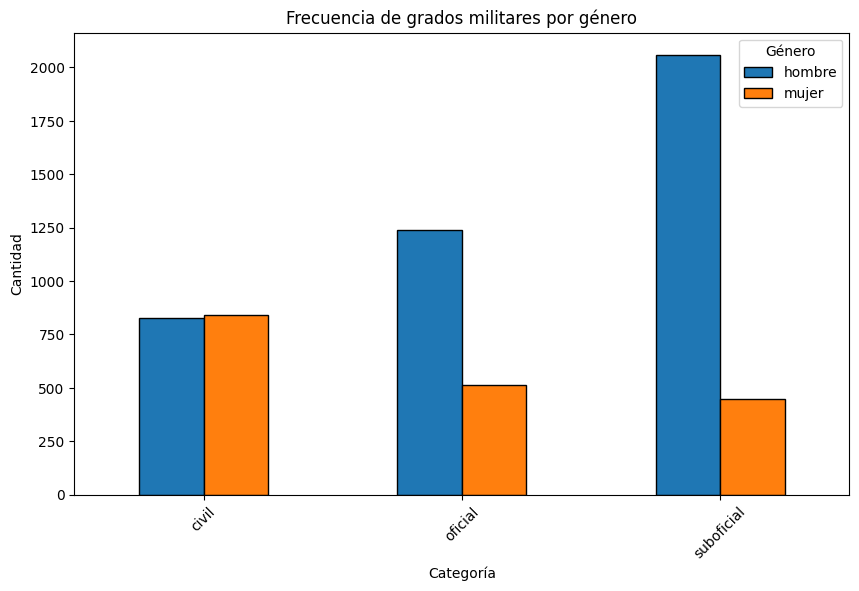

In [26]:
conteo_genero = df.groupby(["CATEGORIA", "SEXO"]).size().unstack(fill_value=0)

conteo_genero.plot(kind="bar", figsize=(10,6), edgecolor="black")
plt.title("Frecuencia de grados militares por género")
plt.xlabel("Categoría")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Género")
plt.show()